### Stationarity Exercise

In [38]:
# import matplotlib
import matplotlib.pyplot as plt

# import random
import random

# set a random seed
random.seed(5)

import pandas as pd
import numpy as np

* generate a NON stationary time-series

In [50]:
passengers = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)


* plot the NON stationary series generated above

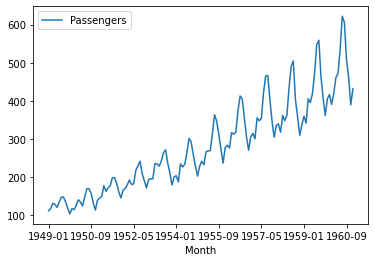

In [17]:
passengers.plot()
plt.show()

* generate a stationary time-series

In [8]:
births = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv", header=0, index_col=0)


* plot the stationary series generated above

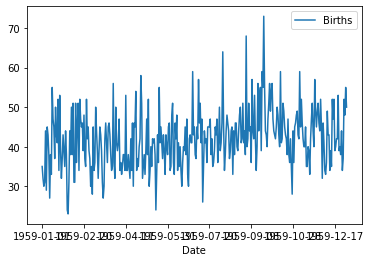

In [10]:
births.plot()
plt.show()

* Create a function `'ADF_Stationarity_Test'` with the input parameters `timeseries` and `significance_level` which: 
    * prints the adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)


In [27]:
from statsmodels.tsa.stattools import adfuller

def ADF_Stationarity_Test(timeseries, significance_level):
    X = timeseries.values
    result = adfuller(X)
    p_value = result[1]
    print('p_value:', round(p_value, 4))
    if (p_value > significance_level):
        print("time series is non-stationary")
    else:
        print("time series is stationary")

* Apply the function `'ADF_Stationarity_Test'` to find out whether the timeseries generated above are stationary.

In [28]:

ADF_Stationarity_Test(births, 0.05)

p_value: 0.0001
time series is stationary


In [29]:
ADF_Stationarity_Test(passengers, 0.05)

p_value: 0.9919
time series is non-stationary


* Apply a suitable transformation to make the NON stationary time series stationary.

In [ ]:
# # https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/
# # use differenceing (yt‘ = yt – y(t-1))
# train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)
# train['#Passengers_diff'].dropna().plot()

In [ ]:
# # seasonal differencing yt‘ = yt – y(t-n) (eg subtract mondays)
# n=7
# train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(n)

Transformation
Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on our air passenger dataset:

In [ ]:
# train['#Passengers_log'] = np.log(train['#Passengers'])
# train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)
# train['#Passengers_log_diff'].dropna().plot()

In [51]:
passengers['passengers_log'] = np.log(passengers['Passengers'])

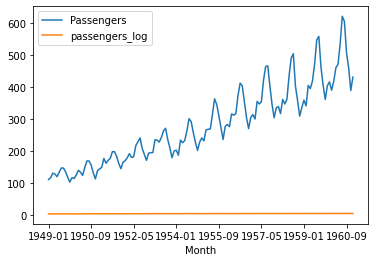

In [52]:
passengers.plot()
plt.show()

In [54]:
ADF_Stationarity_Test(passengers['passengers_log'], 0.05)

p_value: 0.4224
time series is non-stationary


In [55]:
passengers['passengers_log_diff'] = passengers['passengers_log']- passengers['passengers_log'].shift(1)

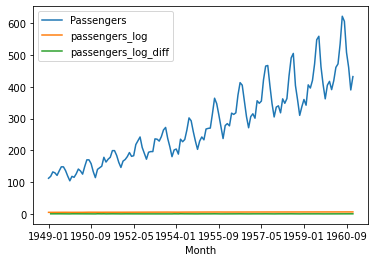

In [56]:
passengers.plot()
plt.show()

* plot the transformed time series

In [34]:
ADF_Stationarity_Test(passengers['passengers_diff'].dropna(), 0.05)

p_value: 0.0542
time series is non-stationary


* Apply the function `'ADF_Stationarity_Test'` to find out whether the transformed timeseries is stationary.

In [49]:
ADF_Stationarity_Test(passengers['passengers_log_diff'].dropna(), 0.05)

p_value: 0.0711
time series is non-stationary
